In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
df = pd.read_csv(r'C:\Users\Lucas\Desktop\global-gender-gap-index-2013.csv', encoding= 'unicode_escape')
df1 = pd.read_csv(r'C:\Users\Lucas\Desktop\detailed-rankings-2013.csv', encoding= 'unicode_escape')
df.drop(["ISO3", "2012 Countries", "2013 Rank", "2012 Rank", "2011 Rank", "2010 Rank", "2009 Rank", "2008 Rank", "2007 Rank", "2006 Rank"], axis=1, inplace=True)
df1.drop(["ISO3","Overall Rank","Economic Participation and Opportunity Rank","Educational Attainment Rank","Health and Survival Rank","Political Empowerment Rank"], axis=1, inplace=True)
df1.head()

,Country,Overall Score,Economic Participation and Opportunity Score,Educational Attainment Score,Health and Survival Score,Political Empowerment Score
0,Iceland,0.8731,0.7684,1.0000,0.9696,0.7544
1,Finland,0.8421,0.7727,1.0000,0.9796,0.6162
2,Norway,0.8417,0.8357,1.0000,0.9697,0.5616
3,Sweden,0.8129,0.7829,0.9977,0.9735,0.4976
4,Philippines,0.7832,0.7773,1.0000,0.9796,0.3760


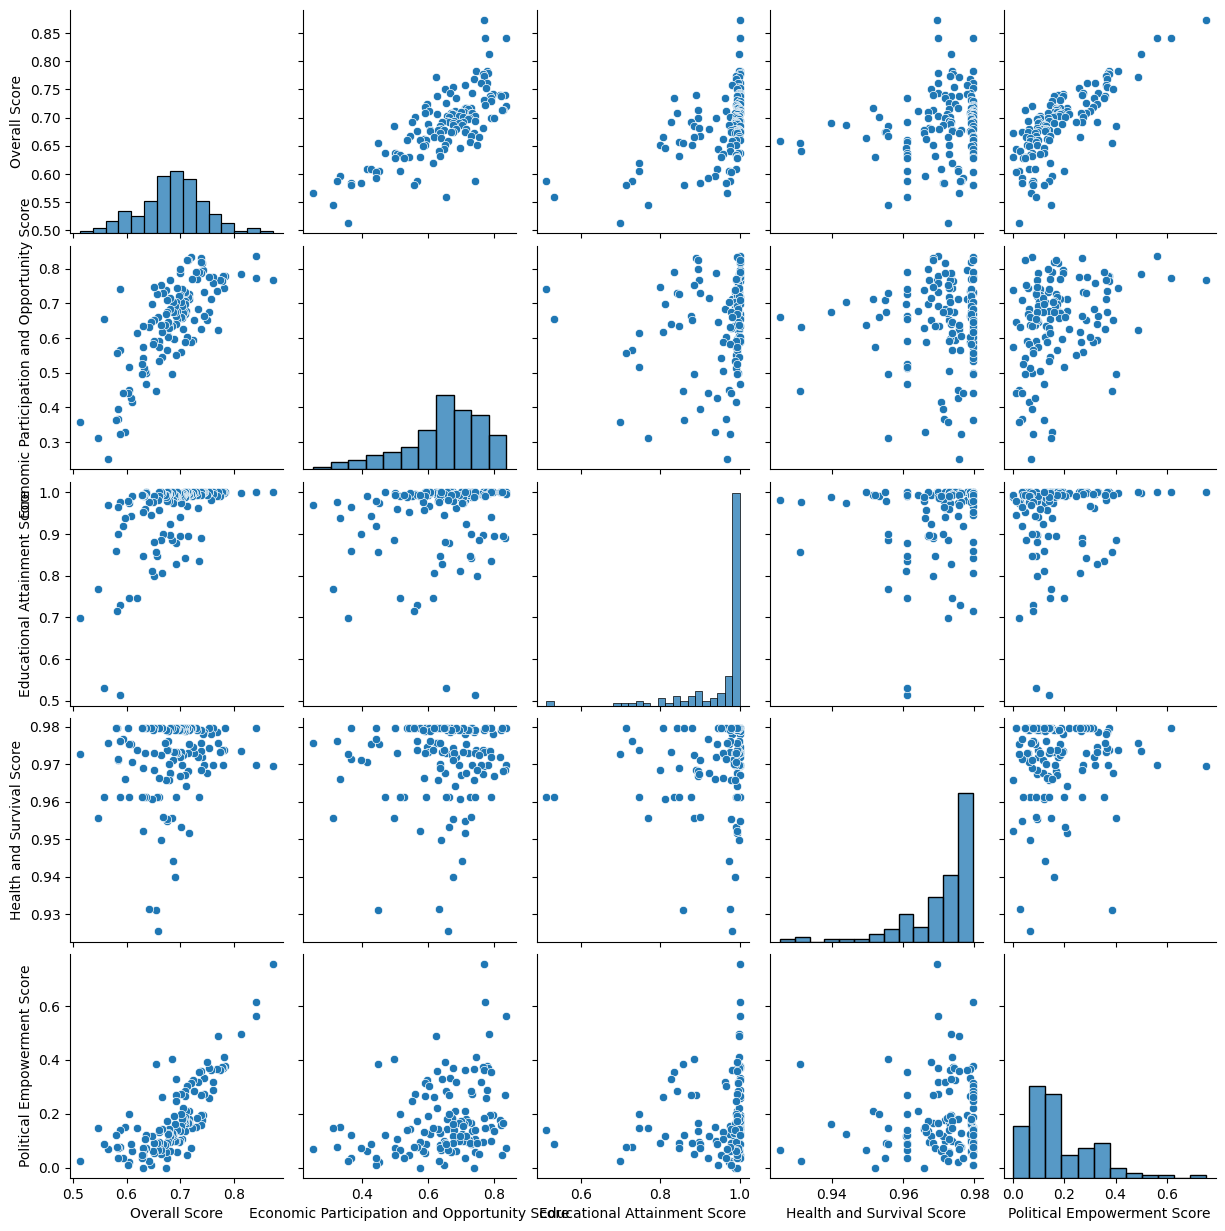

In [46]:
sns.pairplot(df1);

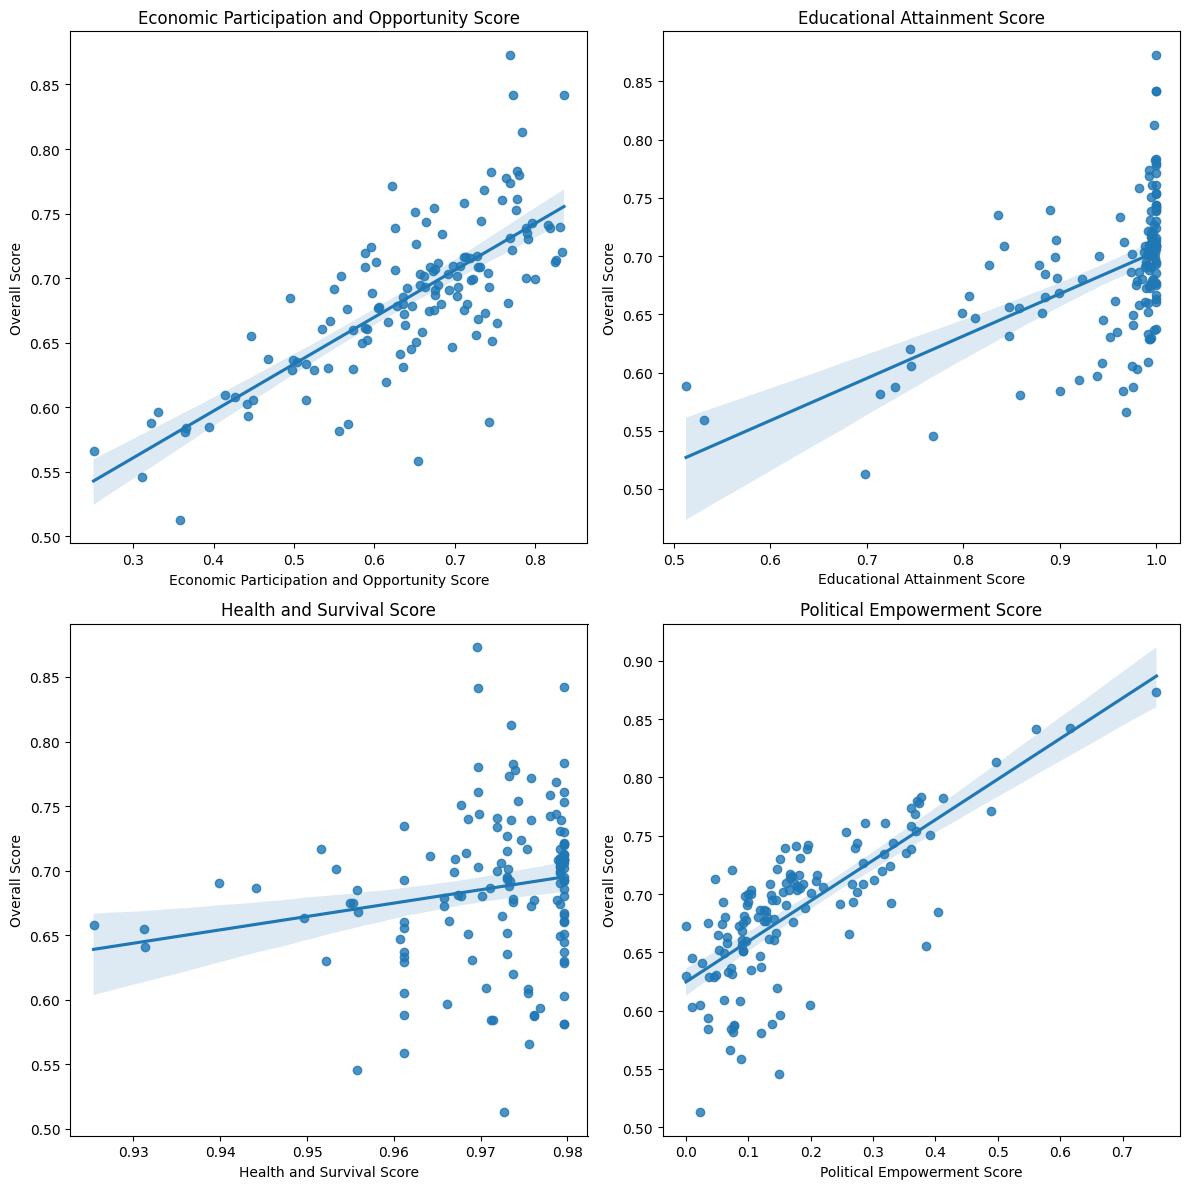

In [47]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import warnings
warnings.filterwarnings("ignore")
col=['Economic Participation and Opportunity Score','Educational Attainment Score', 'Health and Survival Score','Political Empowerment Score']
fig = plt.figure(figsize=(12,12))

for i in range(len(col)):
    plt.subplot(2,2,i+1)
    plt.title(col[i])
    sns.regplot(data=df,x=df1[col[i]],y=df1['Overall Score'])

plt.tight_layout()
plt.show()

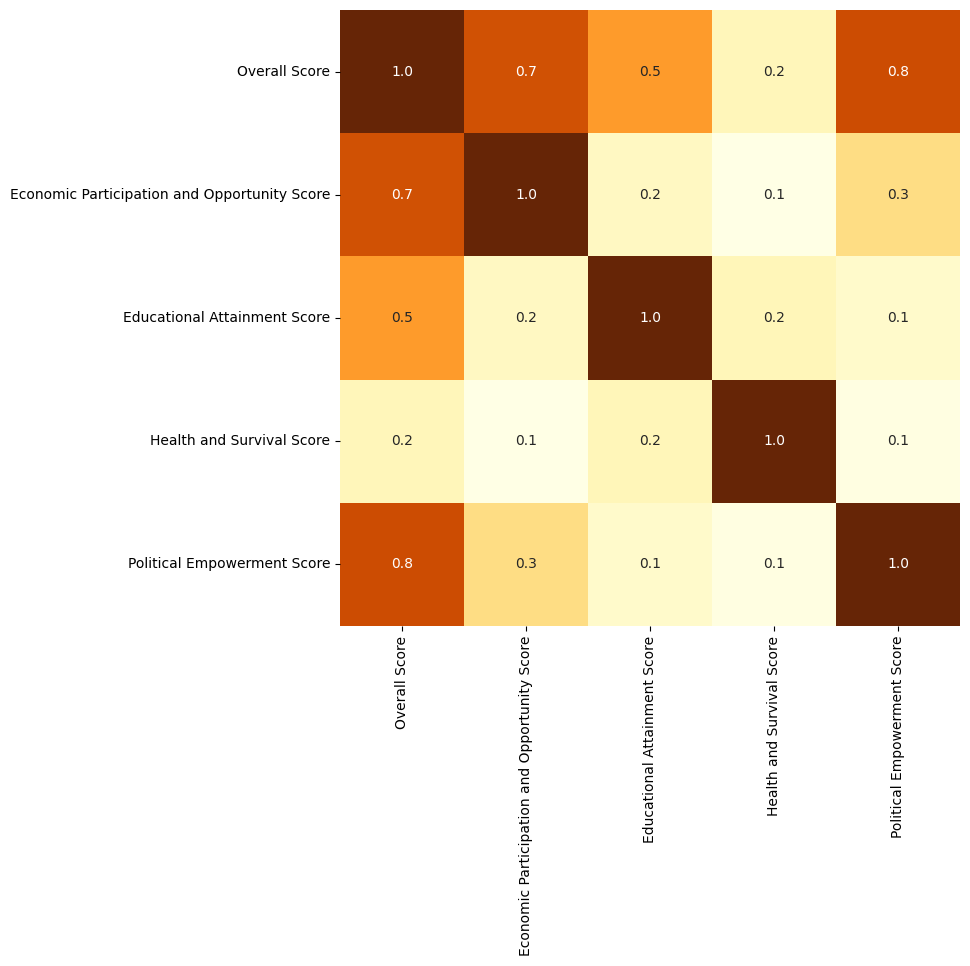

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap(df1.corr(),annot=True, cbar=False, cmap="YlOrBr", fmt='.1f');

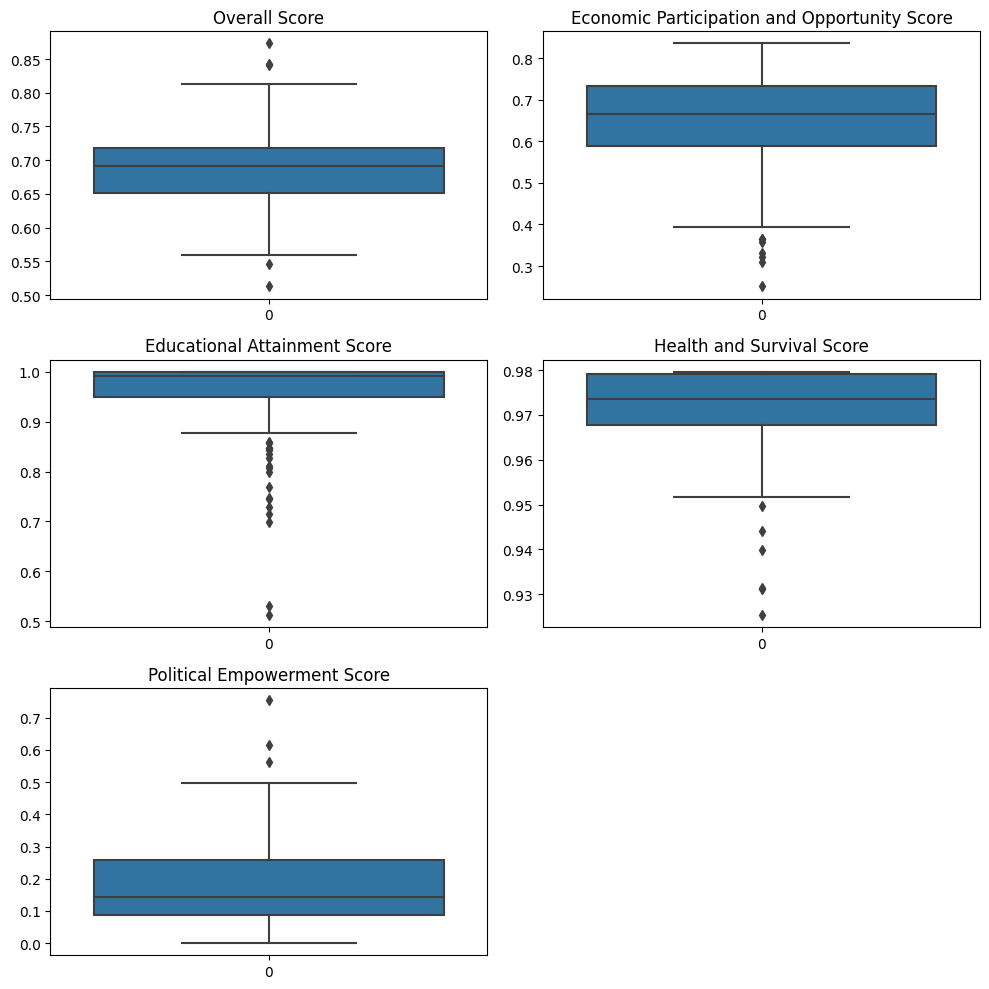

In [49]:
col2=['Overall Score','Economic Participation and Opportunity Score',
       'Educational Attainment Score', 'Health and Survival Score',
       'Political Empowerment Score']

fig = plt.figure(figsize=(10,10))

for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    plt.title(col2[i])
    sns.boxplot(data=df1[col2[i]])

plt.tight_layout()
plt.show()

In [51]:
df2=df1.drop(['Country','Overall Score'],axis=1)

import sklearn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df2)
feature = pca.transform(df2)
pca1=pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df2.columns))])
pca1.head()

,PC1,PC2,PC3,PC4
0,0.524263,0.274638,0.009486,0.004727
1,0.421773,0.182262,0.001076,-0.005741
2,0.419770,0.099196,0.008024,0.004052
3,0.337462,0.098242,-0.002508,-0.000088
4,0.241712,0.023902,-0.013643,-0.006562


<AxesSubplot:>

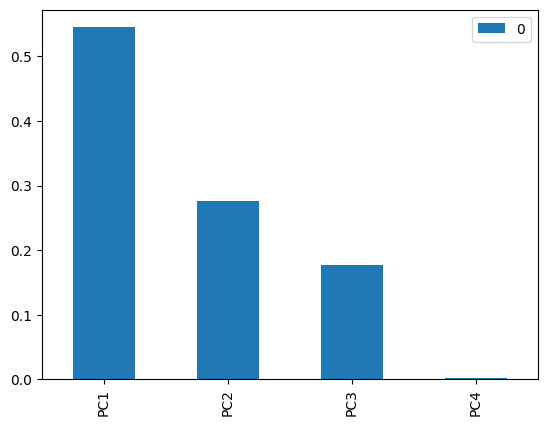

In [52]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df2.columns))]).plot.bar()

In [53]:
df1['PCA1']=pca1['PC1']
df1['PCA2']=pca1['PC2']

In [54]:
def category(ex):
    if ex >= 0.717700:
        return 1
    elif 0.691250 <= ex < 0.717700:
        return 2
    elif 0.651675 <= ex < 0.691250:
        return 3
    else:
        return 4

In [57]:
df1.loc[:,'category']=df1.loc[:,'Overall Score'].apply(category)

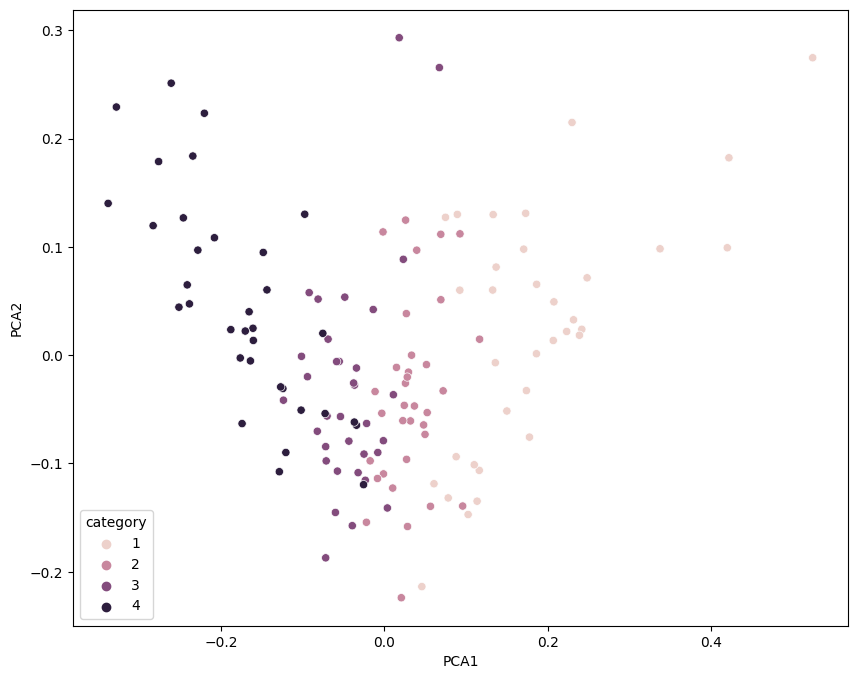

In [65]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df1, x='PCA1', y='PCA2', hue='category');

In [66]:
df1.groupby('category').mean().T

category,1,2,3,4
Overall Score,0.759262,0.704503,0.673109,0.608703
Economic Participation and Opportunity Score,0.742485,0.693406,0.639371,0.506965
Educational Attainment Score,0.988338,0.973250,0.962959,0.881624
Health and Survival Score,0.974697,0.974003,0.965924,0.969850
Political Empowerment Score,0.331535,0.177353,0.124218,0.076426
PCA1,0.184105,0.033451,-0.042669,-0.174887
PCA2,0.022664,-0.038191,-0.030527,0.046053


In [67]:
df1[df1['Country']=='Brazil']

,Country,Overall Score,Economic Participation and Opportunity Score,Educational Attainment Score,Health and Survival Score,Political Empowerment Score,PCA1,PCA2,category
61,Brazil,0.6949,0.6561,1.0,0.9796,0.144,-0.011282,-0.033584,2


In [73]:
df1[df1['Country']=='Switzerland']

,Country,Overall Score,Economic Participation and Opportunity Score,Educational Attainment Score,Health and Survival Score,Political Empowerment Score,PCA1,PCA2,category
8,Switzerland,0.7736,0.7681,0.9919,0.9733,0.361,0.223208,0.021901,1


In [69]:
df1[df1['Political Empowerment Score']>0.5]

,Country,Overall Score,Economic Participation and Opportunity Score,Educational Attainment Score,Health and Survival Score,Political Empowerment Score,PCA1,PCA2,category
0,Iceland,0.8731,0.7684,1.0,0.9696,0.7544,0.524263,0.274638,1
1,Finland,0.8421,0.7727,1.0,0.9796,0.6162,0.421773,0.182262,1
2,Norway,0.8417,0.8357,1.0,0.9697,0.5616,0.419770,0.099196,1
